In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
scaled_x=sx.fit_transform(df.drop('price',axis='columns'))
scaled_x[:5]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ]])

In [6]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
def batch_desc(x,y_true,epochs,learning_rate=0.01):
    number_of_features=x.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=x.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range (epochs):
        y_pred=np.dot(w,scaled_x.T) # w1*area + w2*bedrooms + bias
        
        w_grad=-(2/total_samples)*(x.T.dot(y_true-y_pred))
        b_grad=-(2/total_samples)*np.sum(y_true-y_pred)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.mean(np.square(y_true-y_pred))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost_list,epoch_list

w,b,cost_list,epoch_list=batch_desc(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)

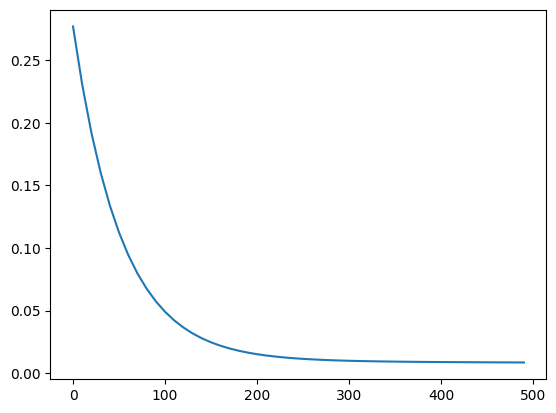

In [8]:
plt.plot(epoch_list,cost_list)

In [23]:
def predict(sq,bd,w,b):
    scaled_x=sx.transform([[sq,bd]])[0]
    pred= w[0]*scaled_x[0]+w[1]*scaled_x[1]+b
    return sy.inverse_transform([[pred]])[0][0]
predict(2500,2,w,b)

c:\WAHTEVER ELSE\GEEK STUFF\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(-82.68744310720885)